#  Bibliothèque

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import re


from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

from sklearn import tree

# Fichier

In [2]:
imdb = pd.read_csv("/Users/manon/Projet/Projet-SIMPLON/Amélioration/Data/movies2.csv", encoding="latin-1")
imdb

,11:14,7.2,Crime,Greg Marcks,Henry Thomas,Colin Hanks,6000000,0,0.1,"Aug 12, 2005"
0,9,7.1,Animation,Shane Acker,Elijah Wood,Jennifer Connelly,30000000,31749894,48559999,"Sep 9, 2009"
1,21,6.8,Crime,Robert Luketic,Jim Sturgess,Kate Bosworth,35000000,81159365,159846429,"Mar 28, 2008"
2,31,5.1,Horror,Rob Zombie,Malcolm McDowell,Richard Brake,1500000,779820,922727,"Oct 21, 2016"
3,42,7.5,Biography,Brian Helgeland,Chadwick Boseman,T.R. Knight,31000000,95020213,97470701,"Apr 12, 2013"
4,300,7.7,Action,Zack Snyder,Gerard Butler,Lena Headey,60000000,210614939,454161935,"Mar 9, 2007"
...,...,...,...,...,...,...,...,...,...,...
3126,Zoolander 2,4.7,Action,Ben Stiller,Ben Stiller,Owen Wilson,50000000,28848693,55348693,"Feb 12, 2016"
3127,Zoom,4.3,Action,Peter Hewitt,Tim Allen,Courteney Cox,35000000,11989328,12506188,"Aug 11, 2006"
3128,Zootopia,8.0,Animation,Rich Moore,Byron Howard,Jason Bateman,150000000,341268248,1019429616,"Mar 4, 2016"
3129,Zulu,6.7,Crime,Jerï¿½ï¿½me Salle,Orlando Bloom,Forest Whitaker,16000000,0,1844228,"Dec 31, 2013"


In [3]:
df = imdb.rename(columns = {'11:14' :'film','7.2' : 'metascore','Crime' : 'genre', 'Greg Marcks':'realisateur', 	'Henry Thomas' : 'acteur_1', 'Colin Hanks':'acteur_2' ,'6000000' : 'budget',	'0': 'votes2',	'0.1': 'vote',	'Aug 12, 2005': 'date'})

# Visualisation

In [4]:
df['genre'].unique()

array(['Animation', 'Crime', 'Horror', 'Biography', 'Action', 'Fantasy',
       'Drama', 'Comedy', 'Adventure', 'Mystery', 'Family', 'Romance',
       'Music', 'Sci-Fi'], dtype=object)

In [6]:
df['genre'].value_counts()

Comedy       796
Action       788
Drama        525
Biography    221
Crime        209
Animation    193
Adventure    185
Horror       181
Mystery       14
Fantasy       12
Romance        3
Family         2
Music          1
Sci-Fi         1
Name: genre, dtype: int64

In [5]:
df['realisateur'].unique()

array(['Shane Acker', 'Robert Luketic', 'Rob Zombie', ..., 'Eli Craig',
       'Peter Hewitt', 'Jerï¿½ï¿½me Salle'], dtype=object)

# Encodé

In [25]:
colonne = ['genre','acteur_1', 'acteur_2', 'realisateur']

In [26]:
df = pd.get_dummies(df, columns= colonne)

In [27]:
df.drop(columns= ['film', 'budget', 'votes2', 'vote', 'date'], axis = 1 )

,metascore,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,genre_Family,genre_Fantasy,...,realisateur_Yolanda Ramke,realisateur_Yorgos Lanthimos,realisateur_Yvette Kaplan,realisateur_Zach Braff,realisateur_Zack Snyder,realisateur_Zak Penn,realisateur_Zal Batmanglij,realisateur_ilex de la Iglesia,realisateur_none,realisateur_ï¿½ï¿½_ï¿½ï¿½_ric Warin
0,7.1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.8,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.5,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126,4.7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3127,4.3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3128,8.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3129,6.7,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df['metascore'] = df['metascore'].astype(float)

# PREPROSS

In [20]:
def convert_to_int(string):
    integer = 0
    try:
        integer = int(string)
    except:
        string = string.lower()
        for i in string:
            integer += ord(i)
    return integer

In [13]:
print(convert_to_int('test'))

448


In [29]:
imdb = imdb.values.tolist()

X = []
y = []


for i in range(len(imdb)):
    X.append([imdb[i][2], imdb[i][3], imdb[i][4], imdb[i][5]]) #Genre, directeur, Acteur 1 et Acteur 2
    y.append(imdb[i][1]) #metascore

for i in range(len(X)):
    for x in range(len(X[i])):
        X[i][x] = convert_to_int(X[i][x])

for i in range(len(y)):
    y[i] = int(float(y[i])*10)

In [30]:
print([imdb[i][2], imdb[i][3], imdb[i][4], imdb[i][5]])
print(imdb[i][1])

['Drama', 'Paul Verhoeven', 'Carice van Houten', 'Sebastian Koch']
7.8


In [31]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state=42)
print(np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

(2191, 4) (940, 4) (2191,) (940,)


In [39]:
model = tree.DecisionTreeClassifier(criterion= 'gini', max_depth=2)


model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [33]:
y_pred = model.predict(X_test)

In [36]:
realisateur = input("Entrer le nom d'un réalisateur ")
realisateur = realisateur.lower()
realisateur = convert_to_int(realisateur)

acteur_1 = input("Entrer le nom d'un premier acteur ")
acteur_1 = acteur_1.lower()
acteur_1 = convert_to_int(acteur_1)

acteur_2 = input("Entrer le nom d'un second acteur ")
acteur_2 = acteur_2.lower()
acteur_2 = convert_to_int(acteur_2)

genre = input("Entrer le genre du film ")
genre = genre.lower()
genre = convert_to_int(genre)


prediction = model.predict([[genre, acteur_1, realisateur, acteur_2]])

print('le metascore du film serait :',prediction[0]/10)


le metascore du film serait : 7.5


In [152]:

# GridSearchCV
from sklearn.model_selection import GridSearchCV
 
#Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
 
# Parameters to try
Parameter_Trials={'n_estimators':[100,200,300,500,1000],
                  'criterion':['gini','entropy'],
                  'max_depth': [2,3]}
 
Grid_Search = GridSearchCV(RF, Parameter_Trials, cv=5, n_jobs=1, verbose=5)
GridSearchResults=Grid_Search.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
/Users/manon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[CV 1/5] END ..criterion=gini, max_depth=2, n_estimators=100; total time=   0.4s
[CV 2/5] END ..criterion=gini, max_depth=2, n_estimators=100; total time=   0.2s
[CV 3/5] END ..criterion=gini, max_depth=2, n_estimators=100; total time=   0.2s
[CV 4/5] END ..criterion=gini, max_depth=2, n_estimators=100; total time=   0.2s
[CV 5/5] END ..criterion=gini, max_depth=2, n_estimators=100; total time=   0.2s
[CV 1/5] END ..criterion=gini, max_depth=2, n_estimators=200; total time=   0.5s
[CV 2/5] END ..criterion=gini, max_depth=2, n_estimators=200; total time=   0.4s
[CV 3/5] END ..criterion=gini, max_depth=2, n_estimators=200; total time=   0.4s
[CV 4/5] END ..criterion=gini, max_dept

In [154]:

# Fetching the best hyperparameters
print(GridSearchResults.best_params_)

# Looking at all the parameter combinations tried by GridSearch
GridSearchResults.cv_results_['params']


{'criterion': 'gini', 'max_depth': 2, 'n_estimators': 1000}


[{'criterion': 'gini', 'max_depth': 2, 'n_estimators': 100},
 {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 200},
 {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 300},
 {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 500},
 {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 1000},
 {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100},
 {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 200},
 {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 300},
 {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 500},
 {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 1000},
 {'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 100},
 {'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 200},
 {'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 300},
 {'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 500},
 {'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 1000},
 {'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 100},
 {'

In [159]:

# GridSearchCV
from sklearn.model_selection import GridSearchCV
 
#Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
DTC = tree.DecisionTreeClassifier()
 
# Parameters to try
Parameter_Trials={'max_features':['auto', 'sqrt', 'log2'],
                  'criterion':['gini','entropy'],
                  'splitter': ['best', 'random']}
 
Grid_Search = GridSearchCV(DTC, Parameter_Trials, cv=5, n_jobs=1, verbose=5)
GridSearchResults=Grid_Search.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=gini, max_features=auto, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_features=auto, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_features=auto, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_features=auto, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_features=auto, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_features=auto, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_features=auto, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_features=auto, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_features=auto, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_features=auto, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_features=sqrt, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini

In [160]:

# Fetching the best hyperparameters
print(GridSearchResults.best_params_)

# Looking at all the parameter combinations tried by GridSearch
GridSearchResults.cv_results_['params']


{'criterion': 'gini', 'max_features': 'auto', 'splitter': 'random'}


[{'criterion': 'gini', 'max_features': 'auto', 'splitter': 'best'},
 {'criterion': 'gini', 'max_features': 'auto', 'splitter': 'random'},
 {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'},
 {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'random'},
 {'criterion': 'gini', 'max_features': 'log2', 'splitter': 'best'},
 {'criterion': 'gini', 'max_features': 'log2', 'splitter': 'random'},
 {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'},
 {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'random'},
 {'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'},
 {'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'random'},
 {'criterion': 'entropy', 'max_features': 'log2', 'splitter': 'best'},
 {'criterion': 'entropy', 'max_features': 'log2', 'splitter': 'random'}]

# Sauvegarde du model

In [40]:
import pickle
import sklearn.externals as extjoblib
import joblib

In [41]:
joblib.dump(model, 'model_amelioration.pkl')
print("Model dumped!")

Model dumped!


In [42]:
model_amelioration = joblib.load('model_amelioration.pkl')

In [43]:
print(model_amelioration)

DecisionTreeClassifier(max_depth=2)


# Dashboard

In [ ]:
X = pd.DataFrame(np.array(X), columns = ['Genre', 'Realisateur', 'Acteur_1','Acteur_2'])
y = pd.DataFrame(np.array(y), columns = ['metascore'])

X = X.set_axis(['Genre', 'Realisateur', 'Acteur_1','Acteur_2'], 
                    axis='columns', inplace=True)
y = y.set_axis(['metascore'], axis='columns', inplace=True)

In [ ]:
def convert_to_int(string):
    integer = 0
    try:
        integer = int(string)
    except:
        string = string.lower()
        for i in string:
            integer += ord(i)
    return integer


imdb = imdb.values.tolist()


X = []
y = []


for i in range(len(imdb)):
    X.append([imdb[i][2], imdb[i][3], imdb[i][4], imdb[i][5]]) #Genre, directeur, Acteur 1 et Acteur 2
    y.append(imdb[i][1]) #metascore

for i in range(len(X)):
    for x in range(len(X[i])):
        X[i][x] = convert_to_int(X[i][x])

for i in range(len(y)):
    y[i] = int(float(y[i])*10)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

X = pd.DataFrame(np.array(X), columns = ['Genre', 'Realisateur', 'Acteur_1','Acteur_2'])
y = pd.DataFrame(np.array(y), columns = ['metascore'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [8]:
import os
import warnings
import sys

import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn import tree

import mlflow
import mlflow.sklearn
from urllib.parse import urlparse

import logging

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

def eval_metrics(y_test, y_pred):
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    return f1, recall, precision
 
integer = 0 
def convert_to_int(string):    
   try:
        integer = int(string)
   except:
        string = string.lower()
        for i in string:
            integer += ord(i)
   return integer
 
if __name__ == "__main__":
   warnings.filterwarnings("ignore")
        
   imdb = pd.read_csv("/Users/manon/Projet/Projet-SIMPLON/Amélioration/Data/movies2.csv", encoding="latin-1")
        
   X = []
   y = []
        
   for i in range(len(imdb)):
      X.append([imdb[i][2], imdb[i][3], imdb[i][4], imdb[i][5]]) #Genre, directeur, Acteur 1 et Acteur 2
      y.append(imdb[i][1]) #metascore
            
   for i in range(len(X)):
      for x in range(len(X[i])):
         X[i][x] = convert_to_int(X[i][x])

   for i in range(len(y)):
      y[i] = int(float(y[i])*10)
            
   X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

   
with mlflow.start_run():
    model = tree.DecisionTreeClassifier()
    model.fit(X_train, y_train)
      
    y_pred = model.predict(X_test)
      
    (f1, recall, precision) =  eval_metrics(y_test, y_pred)
      
    print("  Precision: %s" % precision)
    print("  Recall: %s" % recall)
    print("  F1-score: %s" % f1)

    mlflow.log_metric("precision", precision)
    mlflow.log_metric("F1-score", f1)
    mlflow.log_metric("recall", recall)
      
    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme    

KeyError: 0

In [15]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df = df.set_index(['date'])

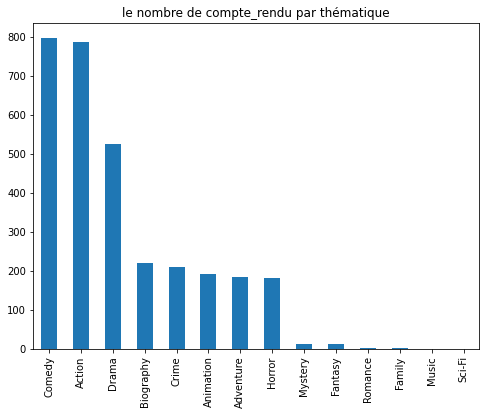

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
plt.title("le nombre de compte_rendu par thématique")
df['genre'].value_counts().plot.bar(ylim=0)
plt.show()

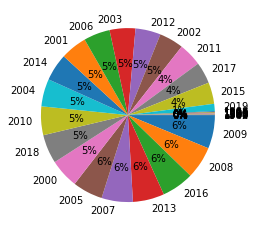

In [18]:
x = df['year'].value_counts()
label = df['year'].unique()

plt.pie(x, labels=label, autopct='%1.0f%%', counterclock=False)
plt.show()

In [17]:
df['year'].value_counts()

2010    195
2006    189
2008    187
2015    183
2011    182
2012    175
2009    170
2013    168
2014    167
2016    160
2007    159
2002    154
2004    153
2003    150
2005    147
2001    141
2000    136
2018    125
2017    125
2019     42
1999      5
1996      3
1993      2
1986      2
1967      1
1981      1
1991      1
1995      1
1994      1
1990      1
1988      1
1982      1
1980      1
1960      1
1944      1
Name: year, dtype: int64